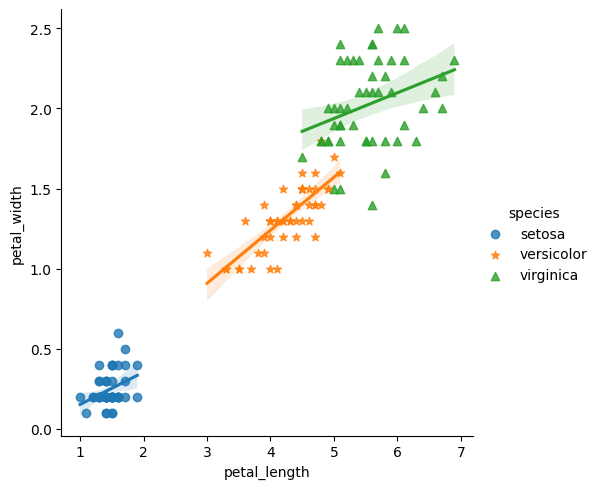

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

sns.lmplot(x = 'petal_length', y = 'petal_width', hue = "species", data = iris, markers = ["o", "*", "^"])

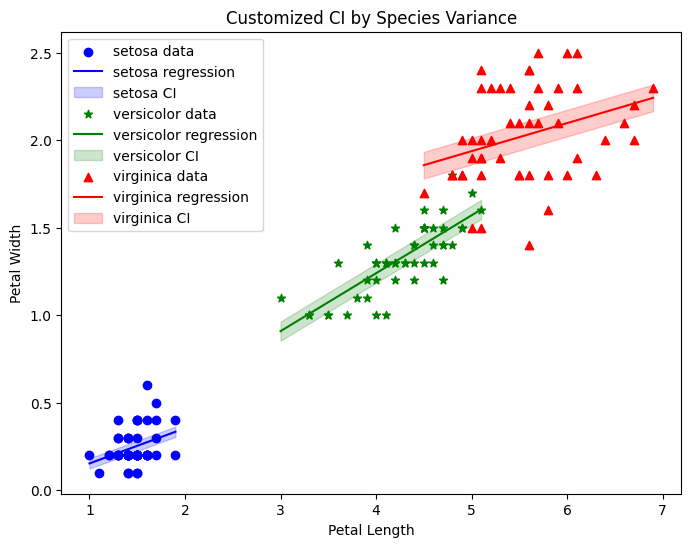

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

# Load iris dataset
iris = sns.load_dataset('iris')

# Set up plot
plt.figure(figsize=(8, 6))

# Define markers and colors
markers = {"setosa": "o", "versicolor": "*", "virginica": "^"}
colors = {"setosa": "blue", "versicolor": "green", "virginica": "red"}

# Loop over species
for species, marker in markers.items():
    # Filter data
    subset = iris[iris['species'] == species]

    # Fit linear model
    model = smf.ols('petal_width ~ petal_length', data=subset).fit()

    # Predict
    x_pred = np.linspace(subset['petal_length'].min(), subset['petal_length'].max(), 100)
    pred_df = pd.DataFrame({'petal_length': x_pred})
    y_pred = model.predict(pred_df)

    # Calculate CI using species variance (manual)
    species_variance = subset['petal_width'].var()
    ci = 1.96 * np.sqrt(species_variance / len(subset))  # Approximate 95% CI

    # Plot scatter points
    plt.scatter(subset['petal_length'], subset['petal_width'], label=f"{species} data", marker=marker, color=colors[species])

    # Plot regression line
    plt.plot(x_pred, y_pred, color=colors[species], label=f"{species} regression")

    # Plot CI band
    plt.fill_between(x_pred, y_pred - ci, y_pred + ci, color=colors[species], alpha=0.2, label=f"{species} CI")

# Labels and legend
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Customized CI by Species Variance')
plt.legend()
plt.show()
